# Exercise 18

## Analyze class homeworks


In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from nltk.stem import PorterStemmer
from sklearn.metrics import accuracy_score, f1_score, average_precision_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize,sent_tokenize
import string
import re
from nltk.probability import FreqDist
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_excel('E18.xlsx')
data.head()

,Sexo,T1,T2,T3,T4,T5,T6
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...


In [2]:
data.fillna("", inplace =True)

# Exercise 18.1

Analyze the writing patterns of each student

In [3]:
data['Concat']= data['T1'] +' '+ data['T2'] +' '+ data['T3'] +' '+ data['T4'] +' '+ data['T5'] +' '+ data['T6']
data['Concat_token']= data['Concat'].apply(lambda x: word_tokenize(x))

In [4]:
data.head()

,Sexo,T1,T2,T3,T4,T5,T6,Concat,Concat_token
0,H,Un científico de datos y un ingeniero de datos...,,Los árboles de decisión es uno de los algoritm...,,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...,Un científico de datos y un ingeniero de datos...,"[Un, científico, de, datos, y, un, ingeniero, ..."
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...,Aunque los dos perfiles cuentan con habilidade...,"[Aunque, los, dos, perfiles, cuentan, con, hab..."
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...,Python vs Stata. Analizar información es un pr...,"[Python, vs, Stata, ., Analizar, información, ..."
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,,Los algoritmos de machine learning buscan pred...,"[Los, algoritmos, de, machine, learning, busca..."
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...,Python vs R para análisis de datos. A pesar de...,"[Python, vs, R, para, análisis, de, datos, ., ..."


Convertir todas las palabras a minúsculas.

In [5]:
for i in range(0,42):
    for w in range(0, len(data['Concat_token'][i])):
        data['Concat_token'][i][w] = data['Concat_token'][i][w].lower()

In [6]:
data1 = data['Concat_token'].sum()

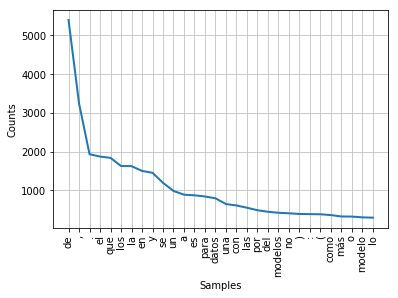

In [7]:
fdist = FreqDist(data1)
fdist.plot(30,cumulative=False)
plt.show()

A nivel general se observa el uso de las stopwords, por lo que se elimmina junto con los espacios y los signos de puntuación.

In [8]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('spanish'))

data_filtered=[]
for w in data1:
    if w not in stop_words:
        data_filtered.append(w)

In [9]:
puncList = {".",";",":","!","?","/","\\",",","#","@","$","&",")","(","\"",""," "}

In [10]:
data_filtered2=[]
for w in data_filtered:
    if w not in puncList:
        data_filtered2.append(w)

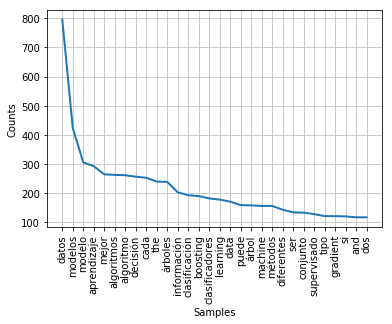

In [11]:
fdist = FreqDist(data_filtered2)
fdist.plot(30,cumulative=False)
plt.show()

Al eliminar las stopwords, los signos de puntuación y los espacios se observa que en el top de las palabras más utlizadas se encuentra datos, modelos, decisión, algotitmos, clasificación, entre otros.

In [12]:
for j in range(0,42):
    for i in data['Concat_token'][j]:
        if i in stop_words:
            data['Concat_token'][j].remove(str(i))

for i in range(0,42):
    for w in data['Concat_token'][i]:
        if w in puncList:
            data['Concat_token'][i].remove(str(w))

for j in range(0,42):
    for i in data['Concat_token'][j]:
        if i in stop_words:
            data['Concat_token'][j].remove(str(i))

for i in range(0,42):
    for w in data['Concat_token'][i]:
        if w in puncList:
            data['Concat_token'][i].remove(str(w))

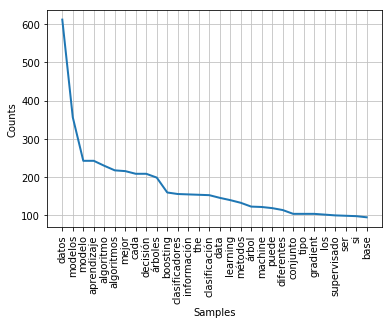

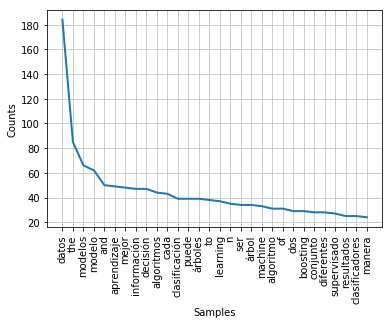

In [13]:
data.groupby('Sexo')['Concat_token'].agg(sum)
fdist = FreqDist(data.groupby('Sexo')['Concat_token'].agg(sum)['H'])
fdist.plot(30,cumulative=False)
plt.show()

fdist = FreqDist(data.groupby('Sexo')['Concat_token'].agg(sum)['M'])
fdist.plot(30,cumulative=False)
plt.show()

0 [('datos', 34), ('the', 26), ('of', 15), ('to', 15), ('cada', 10)]


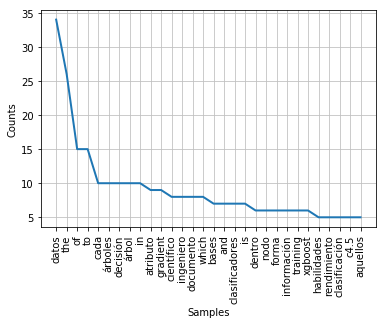

1 [('datos', 21), ('algoritmo', 13), ('data', 7), ('machine', 7), ('boosting', 7)]


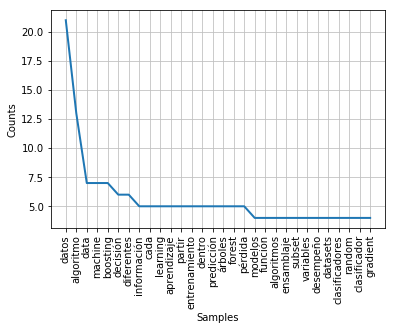

2 [('modelos', 25), ('aprendizaje', 18), ('árboles', 16), ('datos', 14), ('desempeño', 12)]


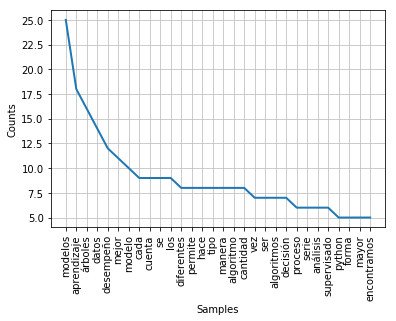

3 [('modelos', 18), ('datos', 15), ('algoritmos', 11), ('clasificación', 10), ('información', 10)]


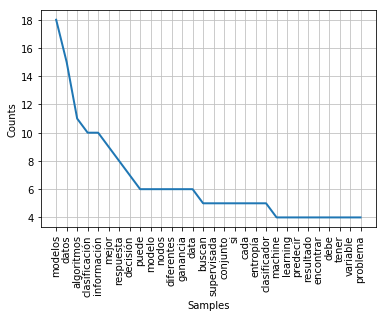

4 [('datos', 13), ('mejor', 12), ('información', 11), ('árboles', 11), ('cada', 9)]


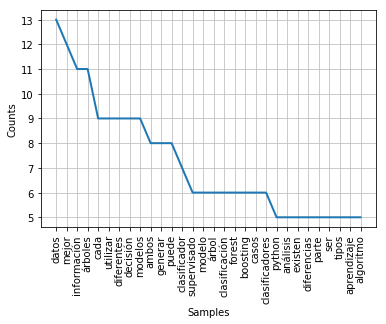

5 [('decisión', 15), ('nodo', 15), ('python', 14), ('métodos', 12), ('conjunto', 10)]


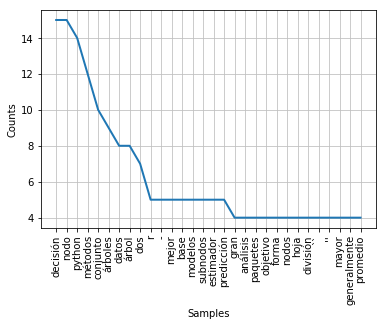

6 [('the', 93), ('to', 27), ('data', 21), ('and', 21), ('that', 20)]


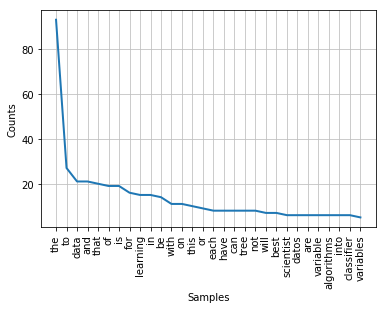

7 [('datos', 48), ('modelos', 15), ('learning', 13), ('puede', 12), ('machine', 12)]


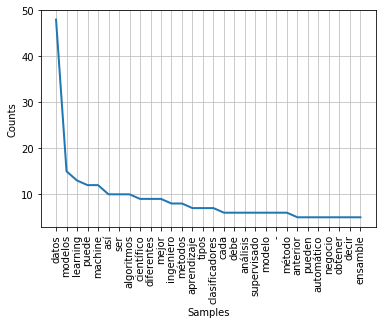

8 [('datos', 20), ('aprendizaje', 13), ('algoritmos', 9), ('algoritmo', 9), ('tipo', 8)]


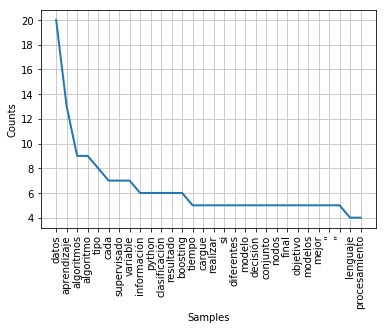

9 [('datos', 37), ('aprendizaje', 19), ('árbol', 13), ('conjunto', 12), ('algoritmo', 11)]


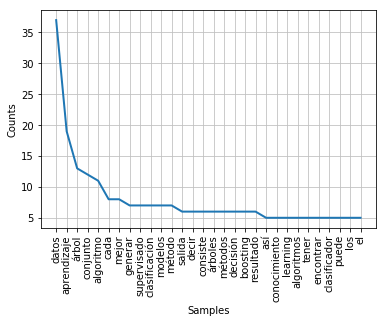

10 [('datos', 19), ('realizar', 17), ('fin', 15), ('modelos', 14), ('análisis', 11)]


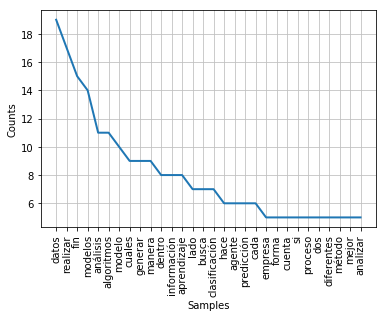

11 [('datos', 35), ('modelos', 26), ('the', 21), ('aprendizaje', 18), ('modelo', 15)]


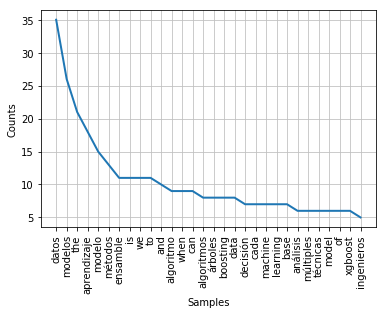

12 [('datos', 22), ('algoritmo', 15), ('algoritmos', 14), ('modelo', 13), ('modelos', 12)]


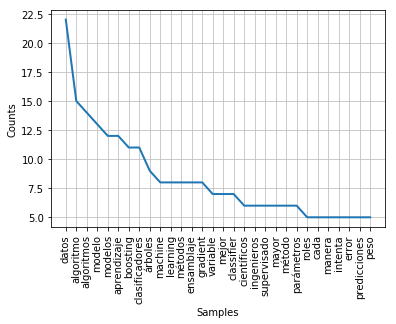

13 [('learning', 13), ('datos', 12), ('modelos', 12), ('data', 11), ('machine', 11)]


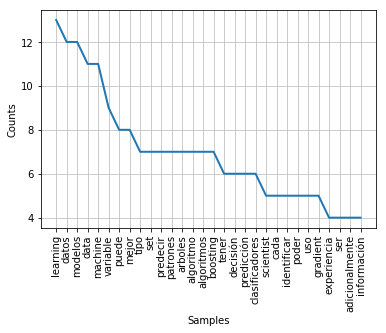

14 [('resultados', 6), ('algoritmos', 5), ('variables', 4), ('random', 4), ('decisión', 4)]


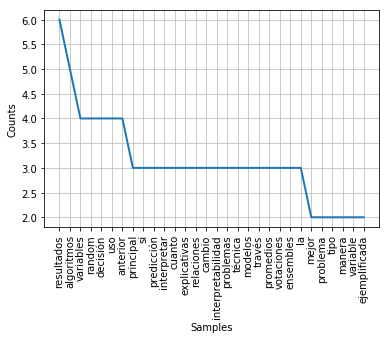

15 [('the', 84), ('and', 48), ('to', 37), ('of', 29), ('is', 23)]


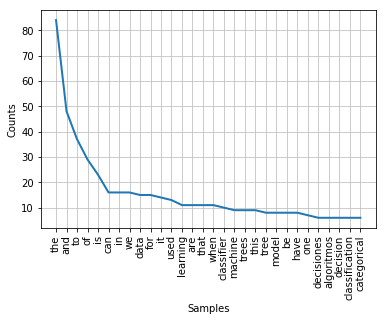

16 [('datos', 22), ('aprendizaje', 14), ('modelo', 12), ('información', 8), ('cada', 8)]


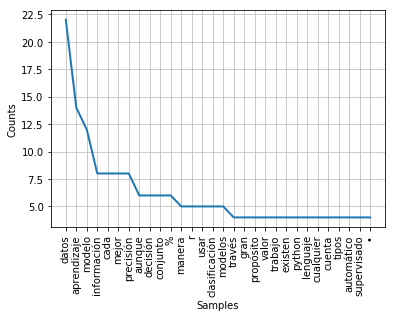

17 [('datos', 38), ('n', 19), ('árboles', 14), ('data', 13), ('algoritmo', 13)]


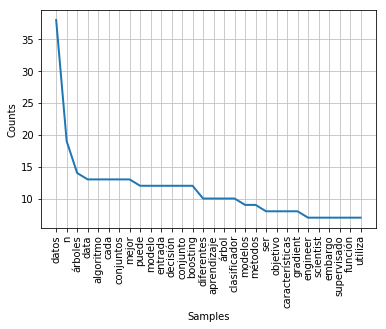

18 [('datos', 16), ('modelos', 11), ('cada', 10), ('algoritmos', 9), ('modelo', 9)]


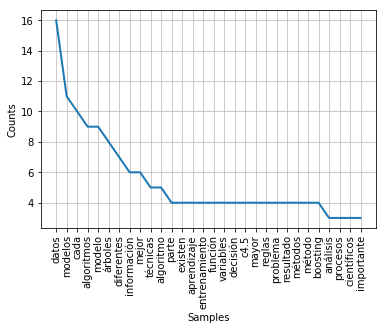

19 [('data', 15), ('datos', 12), ('árboles', 11), ('decisión', 10), ('modelo', 9)]


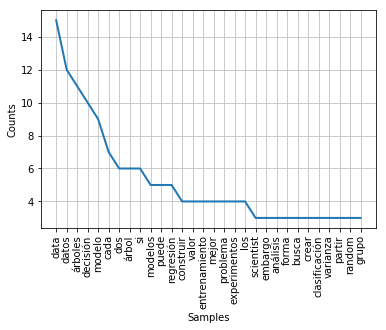

20 [('“', 22), ('”', 22), ('algoritmo', 18), ('machine', 17), ('learning', 17)]


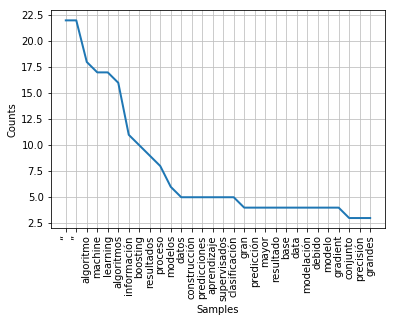

21 [('datos', 41), ('mejor', 31), ('modelos', 30), ('clasificadores', 24), ('clasificación', 17)]


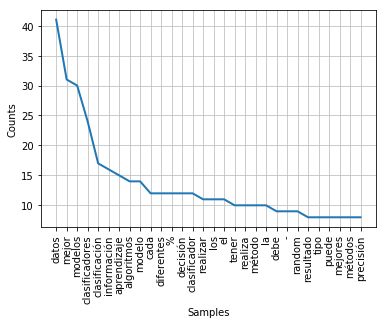

22 [('datos', 15), ('boosting', 5), ('modelo', 5), ('través', 4), ('gradient', 4)]


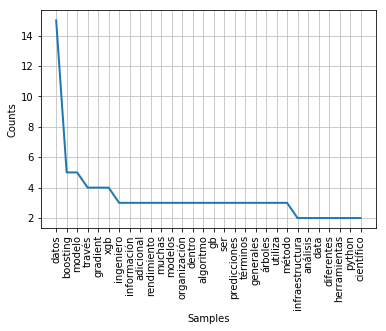

23 [('datos', 24), ('algoritmos', 12), ('modelos', 11), ('tipo', 8), ('árboles', 8)]


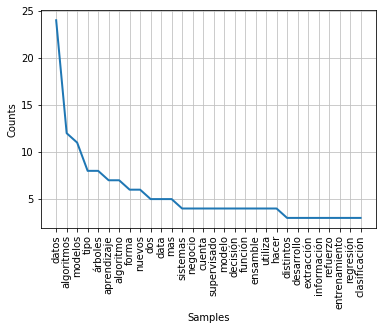

24 [('datos', 28), ('cada', 11), ('modelos', 10), ('mejor', 10), ('precisión', 10)]


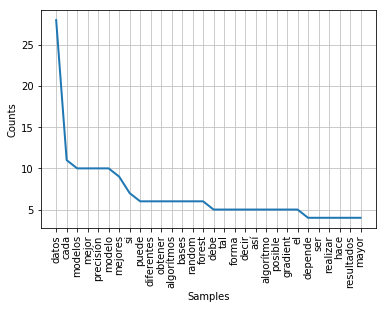

25 [('modelos', 24), ('modelo', 16), ('datos', 11), ('realizar', 11), ('cada', 10)]


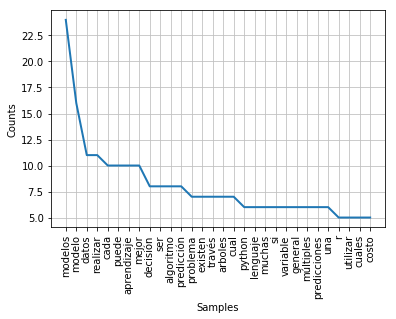

26 [('datos', 25), ('aprendizaje', 18), ('mejor', 11), ('cada', 11), ('clasificadores', 11)]


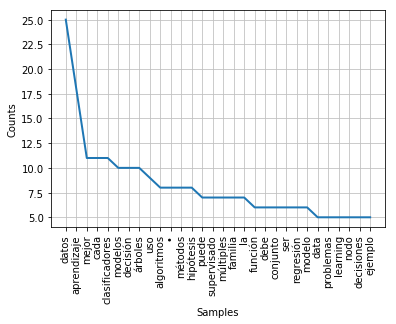

27 [('%', 8), ('decisión', 6), ('clasificadores', 6), ('arboles', 5), ('decisiones', 5)]


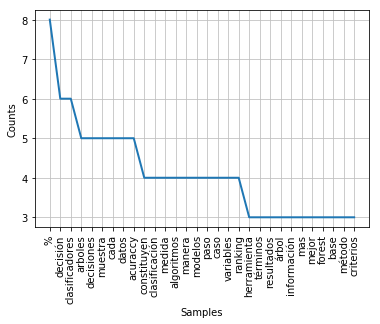

28 [('n', 34), ('datos', 17), ('m', 12), ('modelo', 11), ('funci', 9)]


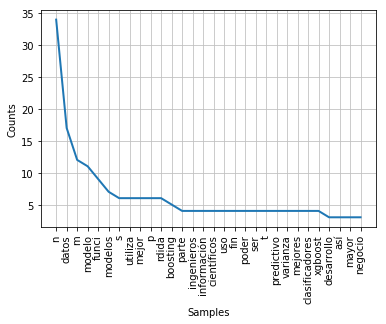

29 [('datos', 13), ('decisión', 13), ('algoritmos', 11), ('python', 10), ('modelos', 10)]


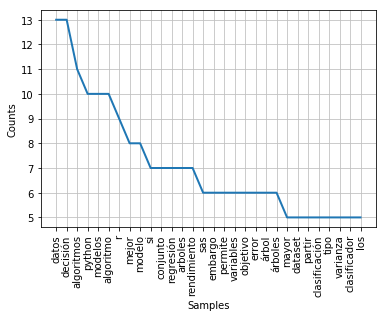

30 [('datos', 28), ('si', 13), ('árboles', 13), ('modelos', 9), ('métodos', 9)]


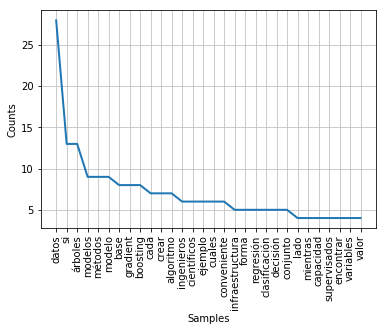

31 [('arboles', 10), ('modelos', 10), ('algoritmo', 9), ('mayor', 7), ('tipo', 7)]


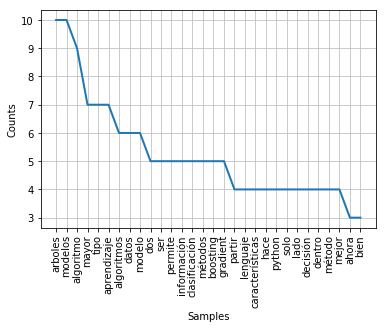

32 [('algoritmo', 9), ('datos', 7), ('data', 6), ('python', 6), ('r', 6)]


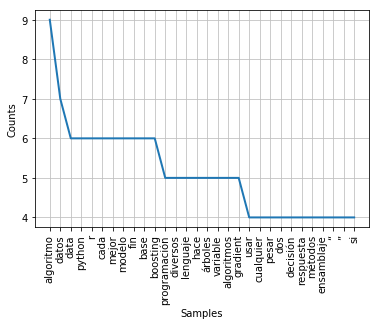

33 [('datos', 32), ('árboles', 21), ('decisión', 16), ('árbol', 11), ('modelo', 11)]


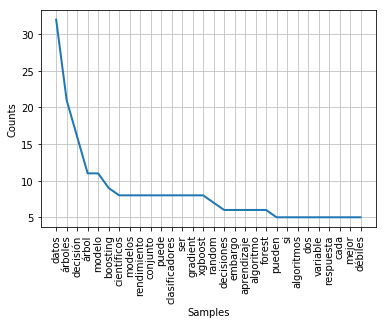

34 [('datos', 18), ('algoritmo', 17), ('aprendizaje', 15), ('arboles', 12), ('decisión', 12)]


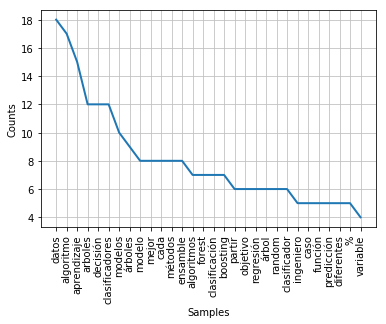

35 [('datos', 34), ('aprendizaje', 13), ('supervisado', 10), ('boosting', 10), ('modelos', 8)]


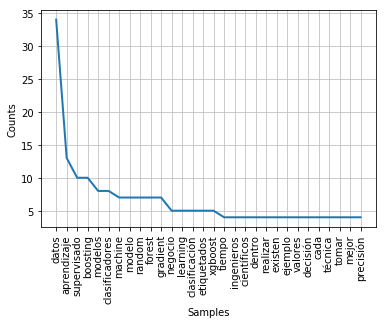

36 [('modelos', 32), ('clasificadores', 17), ('información', 14), ('árbol', 11), ('resultado', 11)]


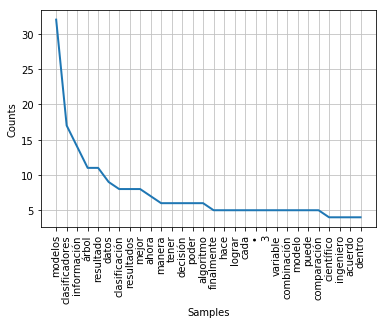

37 [('datos', 23), ('aprendizaje', 15), ('modelo', 14), ('información', 13), ('métodos', 13)]


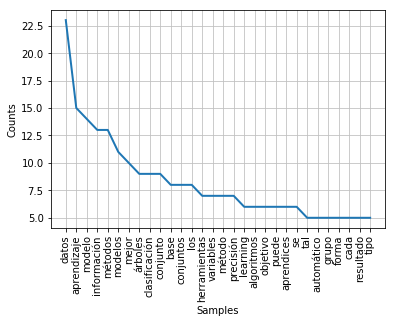

38 [('data', 15), ('and', 14), ('the', 11), ('*', 10), ('to', 8)]


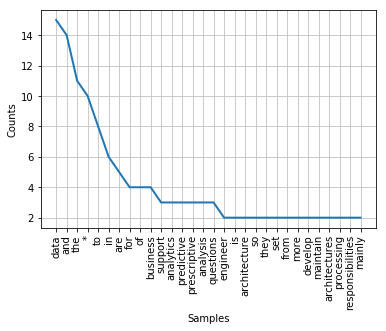

39 [('datos', 26), ('algoritmo', 14), ('clasificación', 11), ('modelo', 11), ('cada', 8)]


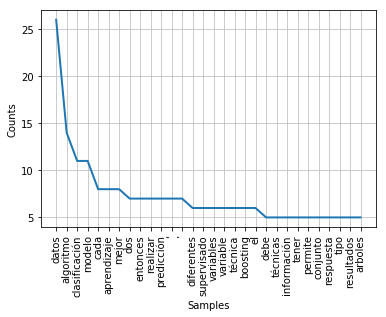

40 [('datos', 20), ('árbol', 14), ('árboles', 12), ('cada', 11), ('decisión', 11)]


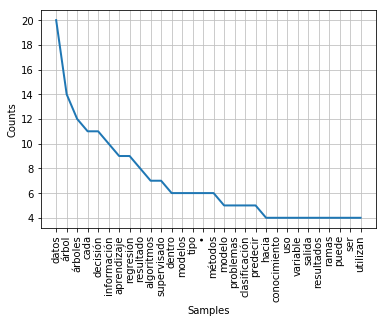

41 [('algoritmos', 18), ('modelos', 15), ('datos', 12), ('cada', 11), ('algoritmo', 11)]


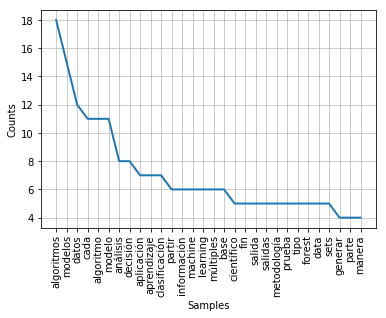

In [14]:
for i in range(0,42):
    fdist = FreqDist(data['Concat_token'][i])
    print(i,fdist.most_common(5))
    fdist.plot(30,cumulative=False)
    plt.show()

# Exercise 18.2

Evaluate the similarities of the homeworks of the students

tip: https://github.com/orsinium/textdistance

In [15]:
import textdistance

In [16]:
sim = pd.DataFrame(index= data.index, columns = ['lenght', 'sex'])
for i in range(0,42):
    sim.lenght[i] = len(data['Concat_token'][i])
    sim.sex[i] = data['Sexo'][i]

<Figure size 432x288 with 0 Axes>

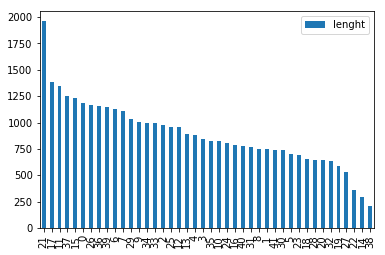

In [17]:
sim_sorted = sim.sort_values('lenght',ascending=False)
plt.figure()
sim_sorted.plot(kind= 'bar')
plt.show()

La gráfica muestra la diferencia entre la cantidad de palabras de las tareas de cada estudiante. En este caso, el estudiante número 21 presenta un número de palabras significativamente alto con respecto a los demás, el cual además presenta más palabras del promedio esperado, puesto que removiendo las stopwords tiene en promedio 350 palabras por tarea, superando el esperado de 300. 

# Exercise 18.3

Create a classifier to predict the sex of each student



In [18]:
stemming = PorterStemmer()
data['Concat_token'] = data['Concat_token'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))

In [19]:
vect = CountVectorizer(analyzer='word')
X_dtm = vect.fit_transform(data['Concat_token'])

In [20]:
tfidf_transformer = TfidfTransformer()
X_dtm = tfidf_transformer.fit_transform(X_dtm)
y = data['Sexo']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.2, random_state=42)

In [22]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [23]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[8 0]
 [1 0]]
0.8888888888888888


In [24]:
print(classification_report(y_test, y_pred))
print(cross_val_score(clf, X_dtm, y, cv=15))

              precision    recall  f1-score   support

           H       0.89      1.00      0.94         8
           M       0.00      0.00      0.00         1

   micro avg       0.89      0.89      0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9

[0.75       0.75       0.75       0.75       0.66666667 0.66666667
 0.66666667 0.66666667 1.         1.         1.         1.
 1.         1.         1.        ]


In [25]:
clf = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [26]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[8 0]
 [1 0]]
0.8888888888888888


In [27]:
print(classification_report(y_test, y_pred))
print(cross_val_score(clf, X_dtm, y, cv=15))

              precision    recall  f1-score   support

           H       0.89      1.00      0.94         8
           M       0.00      0.00      0.00         1

   micro avg       0.89      0.89      0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9

[0.75       0.75       0.75       0.75       0.66666667 0.66666667
 0.66666667 0.66666667 1.         1.         1.         1.
 1.         1.         1.        ]
